In [20]:
from keras import layers
from keras import models

In [21]:
model = models.Sequential()

In [24]:
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))

Instructions for updating:
Colocations handled automatically by placer.


In [25]:
model.add(layers.MaxPooling2D((2,2)))

In [26]:
model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))

In [27]:
model.add(layers.Conv2D(128, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))

In [28]:
model.add(layers.Conv2D(128, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))

In [30]:
model.add(layers.Flatten())

In [31]:
model.add(layers.Dense(512,activation='relu'))

In [32]:
model.add(layers.Dense(1,activation='sigmoid'))

In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [34]:
from keras import optimizers

In [37]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

# 图像预处理
## 读取图像文件
## 讲jpeg 文件解码为rgb像素网格
##  将这些像素网格转为浮点数张量
## 将像素值(0 - 255范围内)缩放到[0,1]区间。  神经网络喜欢处理较小的输入值

# 使用 keras自带饿图像处理辅助工具模块

In [43]:
from keras.preprocessing.image import ImageDataGenerator
import os

In [47]:
train_dir=os.path.join('D:/data/small', 'train')
validation_dir=os.path.join('D:/data/small', 'validation')

In [50]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [44]:
train_generator = train_datagen.flow_from_directory(
train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [51]:
validation_generator = test_datagen.flow_from_directory(
validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [52]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


# 模型篇

In [53]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 142s 1s/step - loss: 0.6875 - acc: 0.5470 - val_loss: 0.6772 - val_acc: 0.5700
Epoch 2/30
100/100 [==============================] - 132s 1s/step - loss: 0.6513 - acc: 0.6210 - val_loss: 0.6283 - val_acc: 0.6530
Epoch 3/30
100/100 [==============================] - 130s 1s/step - loss: 0.5980 - acc: 0.6745 - val_loss: 0.6060 - val_acc: 0.6660
Epoch 4/30
100/100 [==============================] - 129s 1s/step - loss: 0.5578 - acc: 0.7060 - val_loss: 0.6144 - val_acc: 0.6510
Epoch 5/30
100/100 [==============================] - 131s 1s/step - loss: 0.5346 - acc: 0.7355 - val_loss: 0.6426 - val_acc: 0.6340
Epoch 6/30
100/100 [==============================] - 129s 1s/step - loss: 0.5032 - acc: 0.7480 - val_loss: 0.5860 - val_acc: 0.6940
Epoch 7/30
100/100 [==============================] - 131s 1s/step - loss: 0.4720 - acc: 0.7720 - val_loss: 0.6020 - val_acc: 0.6840
Epoch 8/30
100/100 [=

In [56]:
model.save('cats_and_dogs_small_1.h5')

# 画图

In [57]:
import matplotlib.pyplot as plt 

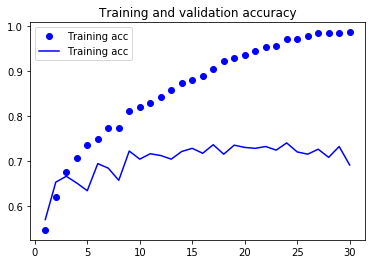

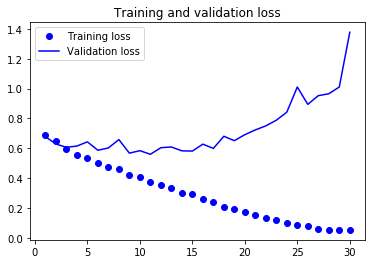

In [58]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss=history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

数据过拟合,除了 dropout 和 权重衰减(L2 正则化) ,使用一种新的方式,数据增强

# 数据增强

In [78]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

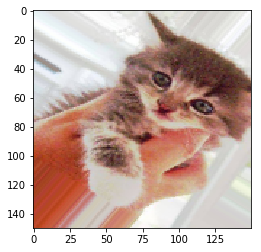

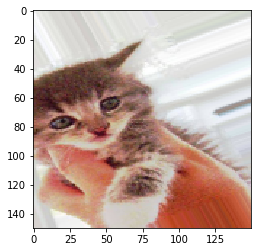

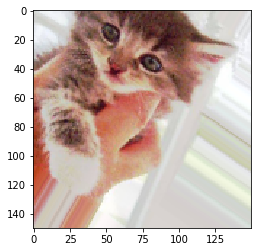

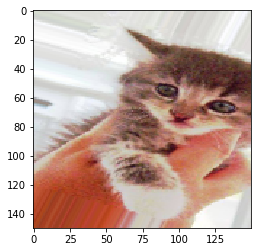

In [79]:
from keras.preprocessing import image

train_cats_dir = os.path.join(train_dir, 'cats')

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path=fnames[3]
img = image.load_img(img_path, target_size=(150,150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

#  重新定义神经网络

In [80]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [81]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [82]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen=ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data = validation_generator,
    validation_steps=50
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 224s 2s/step - loss: 0.6897 - acc: 0.5322 - val_loss: 0.6784 - val_acc: 0.5254
Epoch 2/100
100/100 [==============================] - 203s 2s/step - loss: 0.6737 - acc: 0.5822 - val_loss: 0.6467 - val_acc: 0.6115
Epoch 3/100
100/100 [==============================] - 203s 2s/step - loss: 0.6518 - acc: 0.6153 - val_loss: 0.6499 - val_acc: 0.5901
Epoch 4/100
100/100 [==============================] - 202s 2s/step - loss: 0.6282 - acc: 0.6375 - val_loss: 0.5996 - val_acc: 0.6630
Epoch 5/100
100/100 [==============================] - 204s 2s/step - loss: 0.6252 - acc: 0.6450 - val_loss: 0.6114 - val_acc: 0.6428
Epoch 6/100
100/100 [==============================] - 203s 2s/step - loss: 0.5965 - acc: 0.6725 - val_loss: 0.5915 - val_acc: 0.6707
Epoch 7/100
100/100 [==============================] - 204s 2s/step - loss: 0.5846 - acc: 0.6909 - val_loss: 0.5

100/100 [==============================] - 201s 2s/step - loss: 0.3953 - acc: 0.8256 - val_loss: 0.4216 - val_acc: 0.7945
Epoch 62/100
100/100 [==============================] - 201s 2s/step - loss: 0.3942 - acc: 0.8250 - val_loss: 0.4689 - val_acc: 0.7989
Epoch 63/100
100/100 [==============================] - 200s 2s/step - loss: 0.3904 - acc: 0.8234 - val_loss: 0.5278 - val_acc: 0.7829
Epoch 64/100
100/100 [==============================] - 202s 2s/step - loss: 0.4046 - acc: 0.8181 - val_loss: 0.4790 - val_acc: 0.7925
Epoch 65/100
100/100 [==============================] - 201s 2s/step - loss: 0.3891 - acc: 0.8300 - val_loss: 0.5084 - val_acc: 0.7919
Epoch 66/100
100/100 [==============================] - 201s 2s/step - loss: 0.3874 - acc: 0.8306 - val_loss: 0.4156 - val_acc: 0.8351
Epoch 67/100
100/100 [==============================] - 201s 2s/step - loss: 0.3814 - acc: 0.8288 - val_loss: 0.4884 - val_acc: 0.7925
Epoch 68/100
100/100 [==============================] - 201s 2s/step

In [83]:
model.save('cats_and_dogs_small_2.h5')

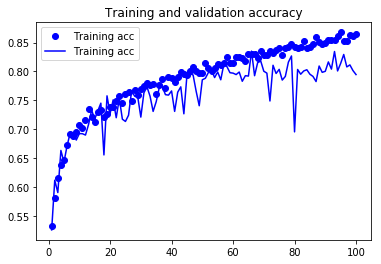

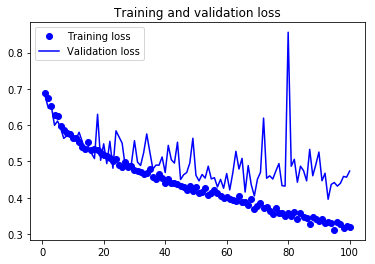

In [84]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss=history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [85]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'

)


NameError: name 'test_dir' is not defined

# perdict

In [88]:
import pandas as pd
test_filenames = os.listdir("D:/data/dogs-vs-cats/test1")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [94]:

IMAGE_WIDTH=150
IMAGE_HEIGHT=150
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3 # RGB color
batch_size=15


test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "D:/data/dogs-vs-cats/test1/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 12500 images.


In [95]:
import numpy as np

predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

In [97]:
threshold = 0.5
test_df['probability'] = predict
test_df['category'] = np.where(test_df['probability'] > threshold, 1,0)

In [98]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission.csv', index=False)